# Module - 2 

# Visualization

In [1]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = p.read_csv('Coviddata.csv')

In [4]:
data.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,12-11-2020,0,1,0,0,0,negative,No,male,Other
1,12-11-2020,1,0,0,0,0,negative,No,female,Other
2,12-11-2020,0,1,0,0,0,negative,No,female,Other
3,12-11-2020,0,0,0,0,0,negative,No,female,Other
4,12-11-2020,0,0,0,0,0,negative,No,male,Other


In [5]:
data.shape

(11864, 10)

In [6]:
data.columns

Index(['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath',
       'head_ache', 'corona_result', 'age_60_and_above', 'gender',
       'test_indication'],
      dtype='object')

In [7]:
df = data.dropna()

<AxesSubplot:xlabel='test_date'>

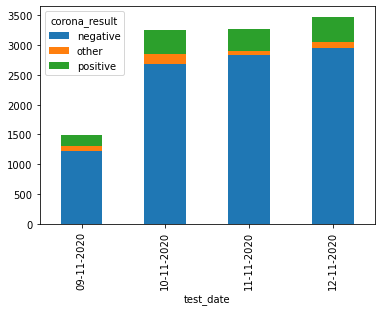

In [8]:
a = p.crosstab(df.test_date,df.corona_result)
a.plot.bar(stacked=True)

<AxesSubplot:xlabel='gender', ylabel='value'>

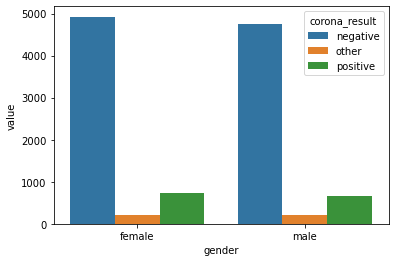

In [9]:
a = p.crosstab(df.gender,df.corona_result)
#a.plot.bar(stacked=True)
# now stack and reset
stacked = a.stack().reset_index().rename(columns={0:'value'})

 # plot grouped bar chart
s.barplot(x=stacked.gender, y=stacked.value, hue=stacked.corona_result)

Text(0.5, 1.0, 'gender & corona_result')

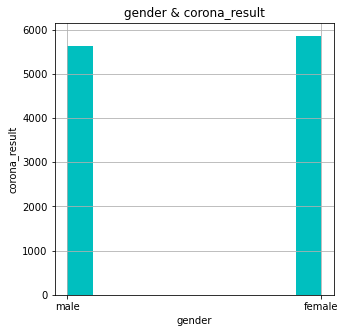

In [10]:
df['gender'].hist(figsize=(5,5), color='c', alpha=1)
plt.xlabel('gender')
plt.ylabel('corona_result')
plt.title('gender & corona_result')

negative    84.30
positive    12.02
other        3.68
Name: corona_result, dtype: float64

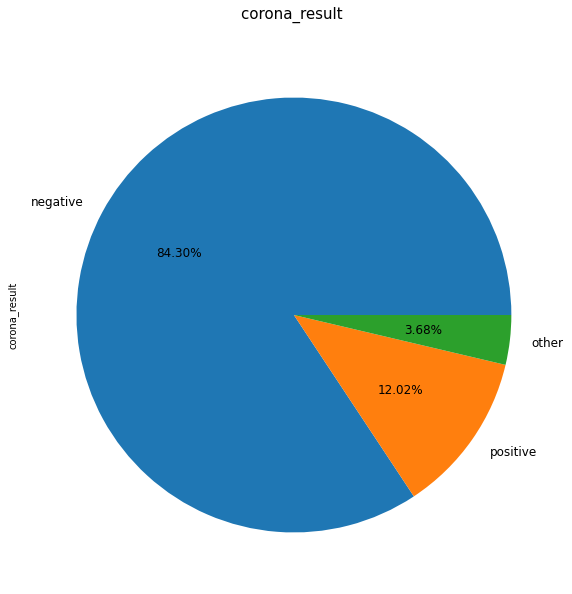

In [11]:
#Propagation by variable
def PropByVar(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12)
    ax.set_title(variable + ' \n', fontsize = 15)
    return n.round(dataframe_pie/df.shape[0]*100,2)

PropByVar(df, 'corona_result')

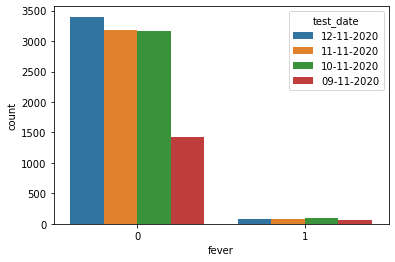

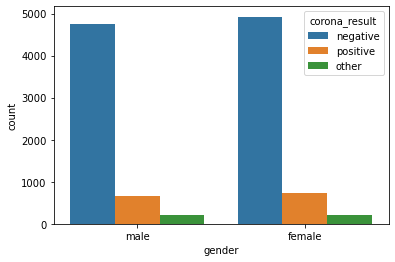

In [12]:
s.countplot(data= df,  x = "fever", hue ="test_date")
plt.show()
s.countplot(data= df,  x = "gender", hue ="corona_result")
plt.show()

<AxesSubplot:xlabel='head_ache', ylabel='corona_result'>

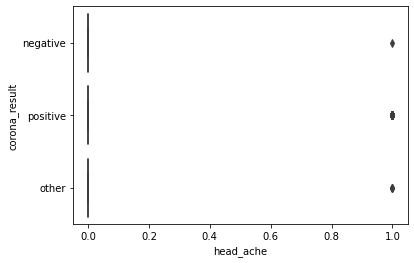

In [14]:
s.boxplot(data= df, x ="head_ache", y = "corona_result")

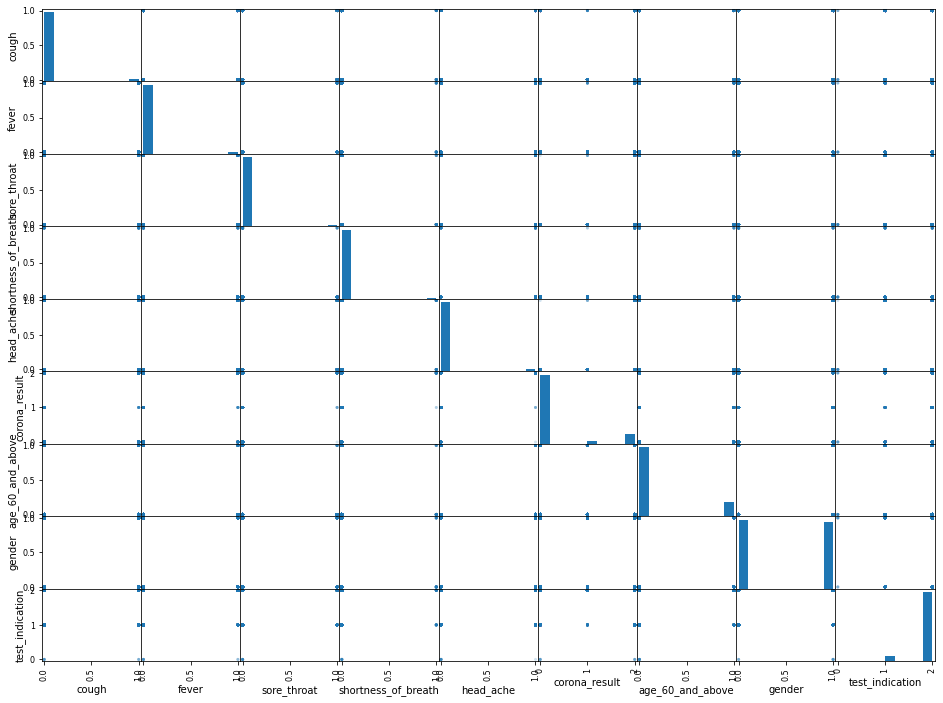

In [28]:
p.plotting.scatter_matrix(df, alpha=0.2, figsize =(16,12))
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'corona_result', 'age_60_and_above', 'gender', 'test_indication']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)

<AxesSubplot:xlabel='gender', ylabel='fever'>

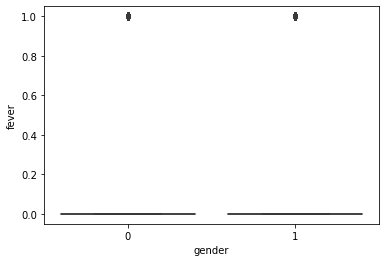

In [30]:
import seaborn as s
s.boxplot(x = df['gender'],y =  df["fever"], color='m')

In [31]:
df.columns

Index(['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath',
       'head_ache', 'corona_result', 'age_60_and_above', 'gender',
       'test_indication'],
      dtype='object')

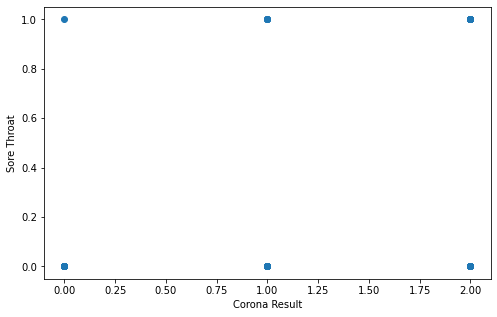

In [41]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(df['corona_result'],df['sore_throat'])
ax.set_xlabel('Corona Result')
ax.set_ylabel('Sore Throat')
plt.show()

0    51.02
1    48.98
Name: gender, dtype: float64

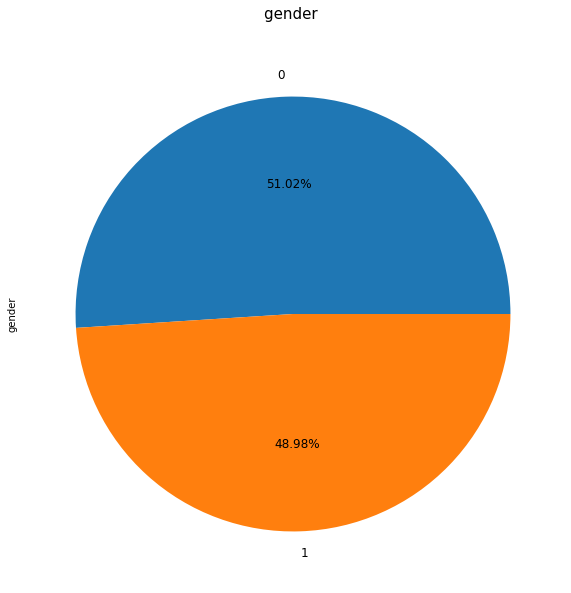

In [33]:
#Propagation by variable
def PropByVar(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12)
    ax.set_title(variable + ' \n', fontsize = 15)
    return n.round(dataframe_pie/df.shape[0]*100,2)

PropByVar(df, 'gender')

<AxesSubplot:>

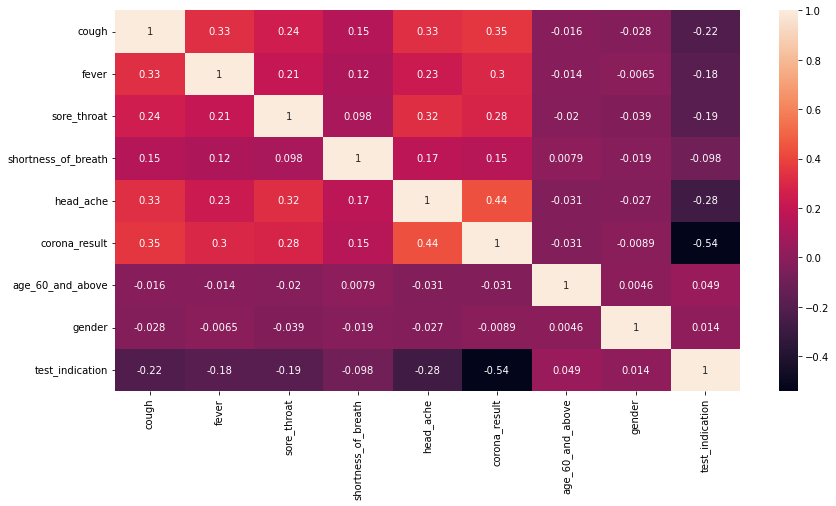

In [34]:
fig, ax = plt.subplots(figsize=(14,7))
s.heatmap(df.corr(), ax=ax, annot=True)

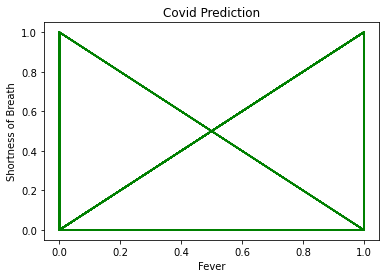

In [35]:
plt.plot(df["fever"], df["shortness_of_breath"], color='g')
plt.xlabel('Fever')
plt.ylabel('Shortness of Breath')
plt.title('Covid Prediction')
plt.show()

In [36]:
df.columns

Index(['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath',
       'head_ache', 'corona_result', 'age_60_and_above', 'gender',
       'test_indication'],
      dtype='object')

In [37]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'corona_result', 'age_60_and_above', 'gender', 'test_indication']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)

In [38]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='corona_result', axis=1)
#Response variable
y = df.loc[:,'corona_result']    

In [39]:
'''We'll use a test size of 30%. We also stratify the split on the response variable,
which is very important to do because there are so few fraudulent transactions'''

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))


Number of training dataset:  8038
Number of test dataset:  3446
Total number of dataset:  11484
